# Chapter 29 - Exercises

In [1]:
from scipy import stats

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

%matplotlib inline

## 29.1

### Answers

* a) 
  - H0: mean uncooked kernels is equal across power levels 
  - HA: not all power level show the same mean unpopped kernels

  - H0: mean uncooked kernels is equal acruoss time ranges
  - HA: not all time ranges show the same mean unpopped kernels
* b)
  - power: 2 (3-1), times: 2 (3-1), error: 4 (6-2)
* c) no; unreplicated two-factor design

## 29.3

### Answers

* a) see below
* b) reject H0 in both cases; evidence support claims of different mean unpopped kernels across powers and times
* c) side-by-side partial boxplots; Normal probability plot of residuals;

In [6]:
p_power = stats.f.sf(13.56, 2, 4)
p_time = stats.f.sf(9.36, 2, 4)

print("P-value (power): {}".format(p_power))
print("P-value (time): {}".format(p_time))

P-value (power): 0.016521170227529556
P-value (time): 0.030995834159888918


## 29.5

### Answers

* a)
  - H0: mean head injury is equal across seats; $\mu_{driver} = \mu_{passenger}$
  - HA: mean head injury differs across seats
  - H0: mean head injury is equal across vehicle size
  - HA: mean head injury differs across vehicle size
* b) yes; appear to have equal variances across groups; some outliers, but looks like we can continue with analysis as-is; predicted vs. residuals shows no clear patterns
* c) 
    - seat: F = 25.501, P-value < 0.0001 => reject H0, evidence supports claim of a difference in means across seats
    - size: F = 8.581, P-value < 0.0001 => reject H0, evidence supports claim of a difference in means across sizes

## 29.7

### Answers


* a) This should be a chi-square test, not ANOVA; the intent of this study should be to look for independence across groups, not compare means across groups. 
* b) see above

## 29.9

### Answers

* chi-square stat: 14.51, P-value: 0.0023; reject H0 (baldness and heart disease are independent)

In [9]:
arr = [[251, 331], [165, 221], [195, 185], [52, 35]]
stats.chi2_contingency(arr)

(14.510189031120616,
 0.0022868832848907308,
 3,
 array([[268.89616725, 313.10383275],
        [178.34006969, 207.65993031],
        [175.56794425, 204.43205575],
        [ 40.19581882,  46.80418118]]))

## 29.11

### Answers

* a)
 - H0: mean shots made is equal across shoes
 - HA: mean shots made differs across shoes
 - H0: mean shots made is equal across time of day
 - HA: mean shots made differs across time of day
* b) see below

In [7]:
d = [
    ["Morning", "Others", 25],
    ["Morning", "Others", 26],
    ["Night", "Others", 27],
    ["Night", "Others", 27],
    ["Morning", "Favorite", 32],
    ["Morning", "Favorite", 22],
    ["Night", "Favorite", 30],
    ["Night", "Favorite", 34],
    ["Morning", "Others", 35],
    ["Morning", "Others", 34],
    ["Night", "Others", 33],
    ["Night", "Others", 30],
    ["Morning", "Favorite", 33],
    ["Morning", "Favorite", 37],
    ["Night", "Favorite", 36],
    ["Night", "Favorite", 38]
]
data = pd.DataFrame(d, columns=["time", "shoes", "shots_made"])
data.head()

,time,shoes,shots_made
0,Morning,Others,25
1,Morning,Others,26
2,Night,Others,27
3,Night,Others,27
4,Morning,Favorite,32


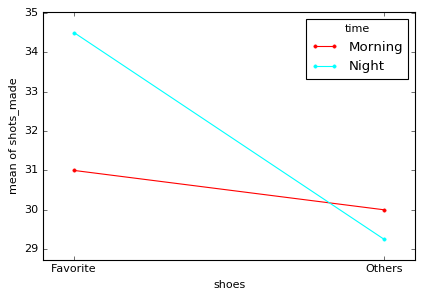

In [22]:
interaction_plot(data.shoes, data.time, data.shots_made);

In [46]:
data['time_resid'] = ols('shots_made ~ time', data).fit().resid
data['shoes_resid'] = ols('shots_made ~ shoes', data).fit().resid
data.head()

,time,shoes,shots_made,time_resid,shoes_resid
0,Morning,Others,25,-5.500,-4.625
1,Morning,Others,26,-4.500,-3.625
2,Night,Others,27,-4.875,-2.625
3,Night,Others,27,-4.875,-2.625
4,Morning,Favorite,32,1.500,-0.750


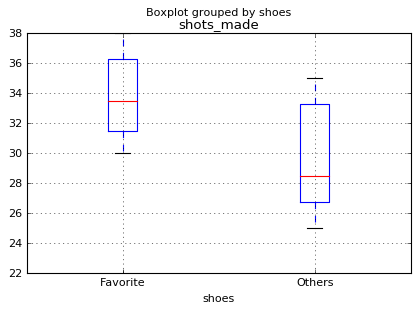

In [42]:
data.boxplot(column="shots_made", by="shoes");

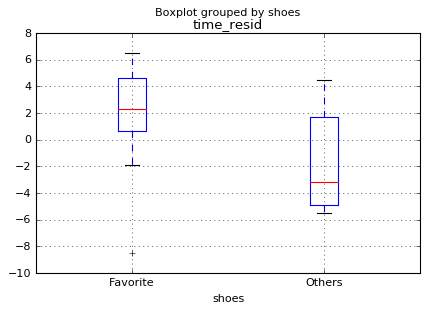

In [45]:
data.boxplot(column="time_resid", by="shoes");

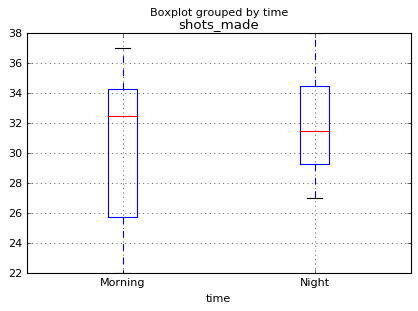

In [43]:
data.boxplot(column="shots_made", by="time");

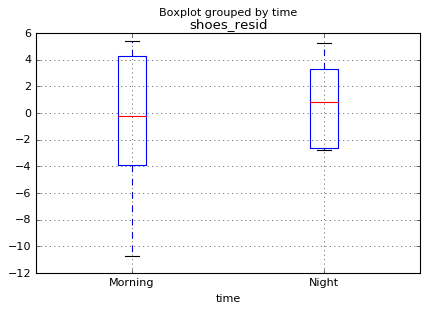

In [41]:
data.boxplot(column="shoes_resid", by="time");

In [8]:
formula = 'shots_made ~ C(time) + C(shoes)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

            sum_sq    df         F    PR(>F)
C(time)     7.5625   1.0  0.348858  0.564888
C(shoes)   39.0625   1.0  1.801952  0.202450
Residual  281.8125  13.0       NaN       NaN


## 29.13

### Answers

* a)
  - H0: mean adjusted # of sprouts is the same across salinity levels
  - HA: mean adjusted # of sprouts differs across salinity levels
  - H0: mean adjusted # of sprouts is the same across temperature levels
  - H0: mean adjusted # of sprouts differs across temperature levels
* b) 
  - Salinity: F-ratio: 23.657, P-Value < 0.0001 => reject H0; evidence supports claim of difference in means
  - Temperature: F-ratio: 1.014, P-Value 0.3779 => fail to reject H0; evidence doesn't support claim of difference in means
  - Interaction term: fail to reject H0

## 29.15

### Answers

- Type: F-ratio = 2712.2, P-Value < 0.0001 => reject H0
- Additive: F-ratio = 21.57, P-Value < 0.0001 => reject H0
- Type X Additive: F-ratio: 6.0736, P-Value: 0.0042 => reject H0
=> Strong evidence to support claims of differing means across both type and additive, as well as variation by the interaction term
 
Residuals plot shows a clear increase in reseidual variance as predicted values increase.  This is a concern from an underlying assumptions standpoint.  Needs further investigation

## 29.17

### Answers

* ?? Not sure how to re-do the analysis without the original data...

## 29.19

### Answers

* a)
 - H0: mean time to failure is equal across brands
 - HA: mean time to failure differs across brands
 - H0: mean time to failure is equal across environment
 - H0: mean time to failure differs across environment
* b) Brand doesn't look to be associated with differences in ttf: means are fairly similar; environment does appear to be associated.
* c) Yes - environment shows very low P-value, brand P-value > 0.05, so not significant at that level; interaction term shows a high F-ratio/low P-value: corresponding, presumably, to the association branc C shows with environment
* d) Brand C shows what appears to be an association between brand and environment
* e) At room temperature, that brand seems to show the worst performance in regards to mean ttf.

## 29.21

### Answers

* Although this analysis shows some of the same findings as seen with the two-factor ANOVA, it's harder to understand the associations at the group level, and how those interact.  Two-factor ANOVA seems to be the more appropriate analysis to answer the questions behind this problem.